In [1]:
%%capture
!pip install -r requirements.txt

In [161]:
%%capture
from read import *
from document_processor import *
from cluster import *
from sklearn.decomposition import PCA
from visualizer import *
from guess_class import *
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [167]:
class TextMining:
    def __init__ (self,df=pd.read_csv('word_matrix_og.csv',index_col = 0)):
        self.df = df
        self.predicted_label = None
        self.modified_predicted = None
    '''
    def process (self):
        Preprocessor = Folder_Reader() 
        self.df = Preprocessor.read_folder()   
        self.df.to_csv('word_matrix.csv')
    '''

    def cluster (self):
        #self.process()

        pca = PCA(n_components=3)
        reduced_data = pd.DataFrame(pca.fit_transform(self.df))

        clusterer = Cluster (reduced_data) #
        self.predicted_label, centroids = clusterer.Kmeans(K=3, maxiter=100, similarity = 'cosine')
        print(self.predicted_label)
        
        return self.predicted_label, centroids
    
    def visualize (self, actual_label):
        self.cluster()
        self.modified_predicted = majority_class (self.predicted_label, actual_label)
        
        print('Predicted',self.modified_predicted)
        print('Actual',actual_label)
        
        visualizer = Visualizer(self.df,self.modified_predicted, actual_label)
        visualizer.plot()

    def evaluate (self, actual_label):
        prec = precision_score(y_true=actual_label, y_pred=self.modified_predicted, average="micro",
                                         zero_division=0)
        print('Precision score:', prec)
        rec = recall_score(y_true=actual_label, y_pred=self.modified_predicted, average="micro")
        print('Recall score:', rec)
        f1 = f1_score(y_true=actual_label, y_pred=self.modified_predicted, average="micro")
        print('F1 score:', f1)

        conf_matrix = confusion_matrix(y_true=actual_label,y_pred=self.modified_predicted)
        print('Confusion matrix')
        print(pd.DataFrame(conf_matrix))

[2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Predicted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
Actual [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]


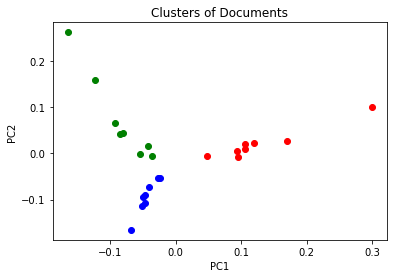

Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix
   0  1  2
0  8  0  0
1  0  8  0
2  0  0  8


In [166]:
#from textmining import *

model = TextMining()

actual_labels = [0]*8 + [1]*8 + [2]*8 #+ unknown_label
model.visualize(actual_labels)
model.evaluate(actual_labels)

In [32]:
model.df

,bank,i,prodi,government,loan,low,mortgage,raise,rate,year,...,mouth,animal,disease,hoof,spread,meat,vaccine,drug,greece,return
C7-article08.txt,0.088609,0.012658,0.069364,0.010747,0.007526,0.022578,0.099068,0.016520,0.091352,0.003301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article05.txt,0.106942,0.011458,0.000000,0.006485,0.149870,0.018166,0.045716,0.009969,0.035670,0.009959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article04.txt,0.015277,0.000000,0.000000,0.025942,0.036332,0.000000,0.042199,0.000000,0.064854,0.015934,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article06.txt,0.000000,0.000000,0.000000,0.082975,0.069726,0.069726,0.053990,0.000000,0.116166,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article07.txt,0.199370,0.000000,0.000000,0.000000,0.000000,0.000000,0.122378,0.130095,0.197481,0.034657,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article03.txt,0.066457,0.039874,0.024277,0.033854,0.000000,0.015805,0.085664,0.000000,0.101562,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article02.txt,0.032418,0.064836,0.118427,0.013762,0.000000,0.019274,0.149241,0.000000,0.055047,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article01.txt,0.071023,0.000000,0.000000,0.000000,0.132710,0.024129,0.121443,0.026482,0.137828,0.015874,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1-article08.txt,0.000000,0.000000,0.000000,0.014468,0.000000,0.000000,0.000000,0.022238,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1-article05.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## HW4 - KNN

In [82]:
df_with_unknown = pd.read_csv('word_matrix_with_unknown.csv',index_col = 0)
df_with_unknown

,ansa,april,association,bank,banking,british,central,european,i,institute,...,norwegian,ostfold,turkey,vestfold,communicable,infect,restriction,return,warn,difference
C7-article08.txt,0.013491,0.000000,0.008260,0.088609,0.000000,0.016520,0.000000,0.000000,0.012658,0.026983,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article05.txt,0.000000,0.000000,0.000000,0.106942,0.005508,0.000000,0.013953,0.000000,0.011458,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article04.txt,0.000000,0.000000,0.000000,0.015277,0.000000,0.000000,0.027905,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article06.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article07.txt,0.000000,0.000000,0.000000,0.199370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article03.txt,0.028332,0.000000,0.000000,0.066457,0.038338,0.000000,0.000000,0.000000,0.039874,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article02.txt,0.000000,0.000000,0.021154,0.032418,0.000000,0.000000,0.000000,0.000000,0.064836,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article01.txt,0.000000,0.000000,0.000000,0.071023,0.014633,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1-article08.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1-article05.txt,0.000000,0.031538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
#Only keep columns (words) with high frequency to avoid too many dimensions
(df_with_unknown.sum() > 0.2).sum()

38

In [84]:
fil = pd.DataFrame(df_with_unknown.sum()).transpose()

In [85]:
df = df_with_unknown.loc[:][fil[fil>0.2].dropna(axis=1).columns]
df

,bank,i,prodi,government,loan,low,mortgage,raise,rate,year,...,mouth,animal,disease,hoof,spread,meat,vaccine,drug,greece,return
C7-article08.txt,0.088609,0.012658,0.069364,0.010747,0.007526,0.022578,0.099068,0.016520,0.091352,0.003301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article05.txt,0.106942,0.011458,0.000000,0.006485,0.149870,0.018166,0.045716,0.009969,0.035670,0.009959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article04.txt,0.015277,0.000000,0.000000,0.025942,0.036332,0.000000,0.042199,0.000000,0.064854,0.015934,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article06.txt,0.000000,0.000000,0.000000,0.082975,0.069726,0.069726,0.053990,0.000000,0.116166,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article07.txt,0.199370,0.000000,0.000000,0.000000,0.000000,0.000000,0.122378,0.130095,0.197481,0.034657,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article03.txt,0.066457,0.039874,0.024277,0.033854,0.000000,0.015805,0.085664,0.000000,0.101562,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article02.txt,0.032418,0.064836,0.118427,0.013762,0.000000,0.019274,0.149241,0.000000,0.055047,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C7-article01.txt,0.071023,0.000000,0.000000,0.000000,0.132710,0.024129,0.121443,0.026482,0.137828,0.015874,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1-article08.txt,0.000000,0.000000,0.000000,0.014468,0.000000,0.000000,0.000000,0.022238,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1-article05.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


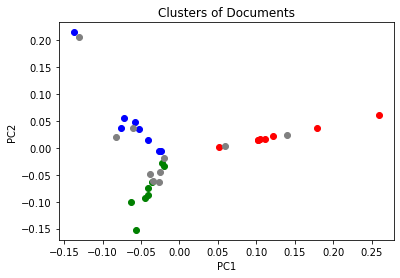

In [173]:
from visualizer import *
visualizer = Visualizer(df,model.modified_predicted, actual_label)
visualizer.plot()

### KNN

In [27]:
unknown_list = list(df.index[24:])
unknown_list

['unknown-unknown08.txt',
 'unknown-unknown09.txt',
 'unknown-unknown04.txt',
 'unknown-unknown10.txt',
 'unknown-unknown05.txt',
 'unknown-unknown07.txt',
 'unknown-unknown06.txt',
 'unknown-unknown02.txt',
 'unknown-unknown03.txt',
 'unknown-unknown01.txt']

In [30]:
known_list = df.index[:24]
known_list

Index(['C7-article08.txt', 'C7-article05.txt', 'C7-article04.txt',
       'C7-article06.txt', 'C7-article07.txt', 'C7-article03.txt',
       'C7-article02.txt', 'C7-article01.txt', 'C1-article08.txt',
       'C1-article05.txt', 'C1-article04.txt', 'C1-article06.txt',
       'C1-article07.txt', 'C1-article03.txt', 'C1-article02.txt',
       'C1-article01.txt', 'C4-article08.txt', 'C4-article05.txt',
       'C4-article04.txt', 'C4-article06.txt', 'C4-article07.txt',
       'C4-article03.txt', 'C4-article02.txt', 'C4-article01.txt'],
      dtype='object')

In [123]:
from similarity import *
#default k = 4 since there are 3 clusters 
# --> won't have a tie
# cosine norm since I used this in last HW (kmeans)
label_corres = {'C1': 1, 'C4': 2, 'C7': 0}
import heapq

def KNN (df,unknown_list,known_list, k=4,norm = 'cosine'): 
    pca = PCA(n_components=3)
    reduced = pd.DataFrame(pca.fit_transform(df))
    reduced = pd.DataFrame(reduced)
    ind = df.index
    reduced.set_index(ind,inplace=True)
    df = reduced
    
    unknown_list = sorted(unknown_list)
    unknown_pred_labels = dict()
    for unknown in unknown_list:
        dist_list = []
        for known in known_list:
            vec1 = df.loc[unknown]
            vec2 = df.loc[known]
            sim = similarity(vec1,vec2,metric=norm)
            dist_list.append([-sim,known])
        heapq.heapify(dist_list)
        
        maj_label_list = []
        for i in range(k):
            sim, known = heapq.heappop(dist_list)
            maj_label_list.append(known[:2])
            
        maj_label = count_majority(maj_label_list)
        #print(maj_label)
        unknown_pred_labels[unknown] = (maj_label)
        
    return unknown_pred_labels
            
def count_majority (label_list):
    label_count = dict()
    
    for label in label_list:
        if label in label_count.keys():
            label_count[label] += 1
            
        else:
            label_count[label] = 1
            
    max_count = -1
    max_label = -1
    
    for label in list(label_count.keys()):
        if label_count[label] > max_count:
            max_count = label_count[label]
            max_label = label
            
    return max_label

In [124]:
from similarity import *
similarity(df.loc['unknown-unknown08.txt'],df.loc['C7-article08.txt'])

0.5384284632478463

In [133]:
knn_pred = KNN (df_with_unknown,unknown_list,known_list)
print(knn_pred)

{'unknown-unknown01.txt': 'C1', 'unknown-unknown02.txt': 'C1', 'unknown-unknown03.txt': 'C1', 'unknown-unknown04.txt': 'C1', 'unknown-unknown05.txt': 'C4', 'unknown-unknown06.txt': 'C4', 'unknown-unknown07.txt': 'C7', 'unknown-unknown08.txt': 'C7', 'unknown-unknown09.txt': 'C4', 'unknown-unknown10.txt': 'C1'}


In [126]:
[label_corres[lab[:2]] for lab in known_list]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]

In [130]:
[label_corres[knn_pred[lab]] for lab in knn_pred.keys()]

[1, 1, 1, 1, 2, 2, 0, 0, 2, 1]

### Evaluate

I self labeled by reading the unknowns
- 'unknown-unknown01.txt': 'C1'
- 'unknown-unknown02.txt': 'C1'
- 'unknown-unknown03.txt': 'C1'
- 'unknown-unknown04.txt': 'C1'
- 'unknown-unknown05.txt': 'C4'
- 'unknown-unknown06.txt': 'C4'
- 'unknown-unknown07.txt': 'C7'
- 'unknown-unknown08.txt': 'C7'
- 'unknown-unknown09.txt': 'C1' and 'C4' (C4 is more)
- 'unknown-unknown10.txt': 'C1' and 'C4' (C1 is more)

Note: unknown 9 and 10 is both C1 and C4


In [147]:
#this label_corres is based on previous homework 
#dataframe order is C7 --> C1 --> C4
label_corres = {'C1': 1, 'C4': 2, 'C7': 0}

pred_label = [label_corres[knn_pred[lab]] for lab in knn_pred.keys()]
true_label = [1,1,1,1,2,2,0,0,2,1]

conf_matrix = confusion_matrix(y_true=true_label,y_pred=pred_label)
print('Confusion matrix')
print(pd.DataFrame(conf_matrix))

Confusion matrix
   0  1  2
0  2  0  0
1  0  5  0
2  0  0  3


### Fuzzy KNN

In [140]:
def fuzzy_KNN (df,unknown_list,known_list, k=4,norm = 'cosine'): 
    pca = PCA(n_components=3)
    reduced = pd.DataFrame(pca.fit_transform(df))
    reduced = pd.DataFrame(reduced)
    ind = df.index
    reduced.set_index(ind,inplace=True)
    df = reduced
    
    unknown_list = sorted(unknown_list)
    unknown_pred_labels = dict()
    for unknown in unknown_list:
        dist_list = []
        for known in known_list:
            vec1 = df.loc[unknown]
            vec2 = df.loc[known]
            sim = similarity(vec1,vec2,metric=norm)
            dist_list.append([-sim,known])
        heapq.heapify(dist_list)
        
        maj_label_list = []
        for i in range(k):
            sim, known = heapq.heappop(dist_list)
            maj_label_list.append(known[:2])
            
        maj_label = label_percentage(maj_label_list)
        #print(maj_label)
        unknown_pred_labels[unknown] = maj_label
        
    return unknown_pred_labels
            
def label_percentage (label_list):
    label_count = dict()
    
    for label in label_list:
        if label in label_count.keys():
            label_count[label] += 1
            
        else:
            label_count[label] = 1
            
    print(label_list)
            
    num_label = len(label_list)
    label_perc = {label: label_count[label]/num_label for label in label_count.keys()}
            
    return label_perc

In [144]:
fuzzy_KNN(df_with_unknown,unknown_list,known_list,k=7)

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']
['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']
['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']
['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']
['C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4']
['C4', 'C4', 'C4', 'C4', 'C4', 'C1', 'C4']
['C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7']
['C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7']
['C4', 'C4', 'C4', 'C4', 'C1', 'C4', 'C4']
['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']


{'unknown-unknown01.txt': {'C1': 1.0},
 'unknown-unknown02.txt': {'C1': 1.0},
 'unknown-unknown03.txt': {'C1': 1.0},
 'unknown-unknown04.txt': {'C1': 1.0},
 'unknown-unknown05.txt': {'C4': 1.0},
 'unknown-unknown06.txt': {'C4': 0.8571428571428571,
  'C1': 0.14285714285714285},
 'unknown-unknown07.txt': {'C7': 1.0},
 'unknown-unknown08.txt': {'C7': 1.0},
 'unknown-unknown09.txt': {'C4': 0.8571428571428571,
  'C1': 0.14285714285714285},
 'unknown-unknown10.txt': {'C1': 1.0}}